<a href="https://colab.research.google.com/github/AlexMourao19/Machine-Learning-Assignments/blob/main/ML_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 2

## 1. Generative classifiers

Alexnadre Araújo Pires Mourão - up201905967

Rúben Miguel Gomes Santos – up201905773


Consider a classification problem with a target variable $y \in \{0, 1\}$ and input features $\boldsymbol{x} = (x_1\; x_2\; x_3\; x_4)^T$, where $x_1 \in \{0, 1\}$, $x_2 \in \{0, 1\}$, and $(x_3, x_4) \in \mathbb{R}^2$. Further assume that:
- $(x_1, x_2)$ is conditionally independent of $(x_3, x_4)$ given $y$;
- $x_1$ and $x_2$ are **dependent** given $y$;
- $x_3$ and $x_4$ are **dependent** given $y$;
- the conditional distributions of $(x_3, x_4)$ given $y$ are Gaussian.

### 1.1

**a)** Enumerate the parameters of the MAP classifier: $$\hat{y} = \text{arg} \max_{y \in \{0, 1\}} p(y)p(\boldsymbol{x} \mid y),$$ and indicate the dimension of each parameter.

**Parametros:**

*   **$p(y)$**, tem dimensão 1 pois $p(y = 0) + p(y = 1) = 1$.

 **Para $p(x|y)$ visto que $p(x_1, x_2)$ são independentes de $p(x_3, x_4)$ então o MAP classifer fica:**
 $$\hat{y} = \text{arg} \max_{y \in \{0, 1\}} p(y)p(\boldsymbol{x_1, x_2} \mid y)p(\boldsymbol{x_3, x_4} \mid y).$$ Logo:


*   **$p(x_1, x_2|y)$** tem dimensão 6, pois $p(x_1, x_2)$, calculado as combinações de probablidade possíveis, $(2^2 = 4)$, para $p(y = 0)$ e $p(y = 1)$, $(2^2*2)$ , mas na verdade como a soma das probabilidades das combinações tem de ser 1, então a dimensão de $p(x_1, x_2|y)$ é: $(2-1)^2*2 = 6$

*  Por fim **$p(x_3, x_4|y)$**, tem dimensão 10, pois vamos ter a média de cada $x$, ou seja 4 parâmetros, e a sua matriz da covariância, que teoreticamente seria 8 para $p(y=0)$ e $p(y=1)$ mas como $σ_{12} = σ_{21}$, então precisamos de estimar 3 parâmetros para cada caso, logo são 6 parâremtros para as covariâncias mais 4 das médias.

**No total precisamos de estimar 17 parâmetros.**




**b)** Given a dataset $\{(\boldsymbol{x}^{(i)}, y^{(i)})\}_{i=1}^n$, write the expressions for the maximum likelihood estimates of the parameters enumerated in the previous question.

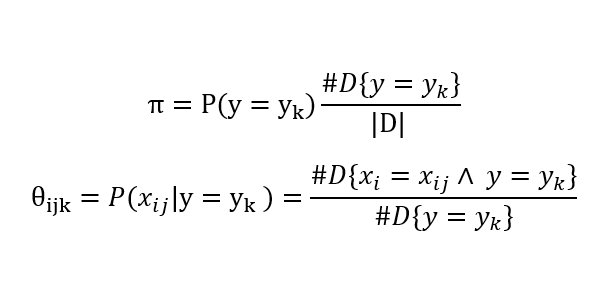


### 1.2

Now, you will implement this classifier in Python. The classifier skeleton is provided below in the class `Classifier`. You may implement additional auxiliary methods that you find useful.

In [ ]:
import numpy as np
from scipy.stats import multivariate_normal
class Classifier:
    def fit(self, X, y):
        '''
        Inputs:
            X - np.array with shape (num_examples_train, 4)
            y - np.array with shape (num_examples_train,)
        '''
        ###
        # YOUR CODE HERE
        assert X.shape[1] == 4

        self.covs, self.means=[], []

        self.priors=np.zeros(2)
        print(self.priors)

        for i in range(2):
            Xc=X[y==i]
            mean = np.mean(Xc, axis=0)
            cov = np.cov(Xc.T)
            self.means.append(mean)
            self.covs.append(cov)
            self.priors[i] = np.sum(y==i) / len(y)



        ###


    def predict(self, X):
        '''
        Inputs:
            X - np.array with shape (num_examples_test, 4)

        Outputs:
            ypred - np.array with shape (num_examples_test,)
            posteriors - np.array with shape (num_examples_test, 2)
        '''
        ###
        # YOUR CODE HERE

        ########
        assert X.shape[1] == 4

        likelihood=np.full((X.shape[0],2), np.nan)
        for i in range(2):
            likelihood[:, i] = multivariate_normal.pdf(X, self.means[i], self.covs[i])

        ########

        posteriors=self.priors.reshape(1,2)*likelihood
        posteriors=posteriors/np.sum(posteriors, axis=1).reshape(X.shape[0],1)

        ypred = np.argmax(posteriors, axis=1)
        return ypred, posteriors

        #########

**N.B.:** In both a) and b), you should avoid for loops as much as possible by using vectorized NumPy operations and broadcasting.

**a)** Implement the `fit` method, which receives as input two `np.array`s:
- `X`, which contains the 4-dimensional training input examples $\boldsymbol{x}^{(i)}$, one per row;
- `y`, which contains the corresponding training labels $y^{(i)} \in \{0,1\}$, one per row.

This method should compute the maximum likelihood estimates of the model parameters and store them as class attributes.

**b)** Implement the `predict` method, which receives as input one `np.array`:
- `X`, which contains the 4-dimensional examples $\boldsymbol{x}^{(i)}$ to be classified, one per row.

This function should return two `np.array`s:
- `ypred`, which should contain the labels predicted for each $\boldsymbol{x}^{(i)}$, one per row.
- `posteriors`, which should contain the posterior probabilities of each class given each $\boldsymbol{x}^{(i)}$, one per row.

If you have solved a) and b) correctly, the code below should run without errors and the reported test accuracy should be higher than 80%.

In [ ]:
import numpy as np

# read the data from file
data = np.genfromtxt('ex1_data.txt')
X, y = data[:, 0:4], data[:, 4].astype(int)

# use the first 400 lines for training and the remaining 100 lines for testing
Xtrain, ytrain = X[0:400], y[0:400]
Xtest, ytest = X[400:], y[400:]

# instantiate the classifier and train it
classifier = Classifier()
classifier.fit(Xtrain, ytrain)

# get the predictions on the test data
ypred, posteriors = classifier.predict(Xtest)
print('Example 0:')
print('  posteriors =', posteriors[0])
print('  predicted class =', ypred[0])
print('  ground-truth class =', ytest[0])
print()
print('Example 1:')
print('  posteriors =', posteriors[1])
print('  predicted class =', ypred[1])
print('  ground-truth class =', ytest[1])
print()
print('Example 2:')
print('  posteriors =', posteriors[2])
print('  predicted class =', ypred[2])
print('  ground-truth class =', ytest[2])
print()

# compute the accuracy on the test set
acc = np.mean(ypred == ytest)
print(f'Test accuracy = {100.*acc:.1f}%')

[0. 0.]
Example 0:
  posteriors = [0.97740872 0.02259128]
  predicted class = 0
  ground-truth class = 0

Example 1:
  posteriors = [0.74882816 0.25117184]
  predicted class = 0
  ground-truth class = 1

Example 2:
  posteriors = [0.02663583 0.97336417]
  predicted class = 1
  ground-truth class = 1

Test accuracy = 92.0%


## 2. Logistic regression

Consider the `heightWeightData.txt` dataset that you have used in the Lab classes. You will use this data to build a Logistic Regression classifier that predicts the sex of an individual given their height and weight.

**a)** Train a Logistic Regression classifier **using only the first 160 rows** of the dataset as training data. You may use Scikit-Learn (`sklearn.linear_model.LogisticRegression`). **Print the values of the learned parameters.**

In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression

data=np.genfromtxt('heightWeightData.txt', delimiter=',')

y, x= data[:,0], data[:,1:]

y[y==2]=0

ytrain, xtrain= y[0:160], x[0:160]
ytest, xtest= y[160:], x[160:]

##########
LogReg=LogisticRegression()

LogReg.fit(xtrain,ytrain)

print('Interception (w0):\n', LogReg.intercept_)
print('Coefficients (w1 and w2):\n', LogReg.coef_)

w0 = LogReg.intercept_
w1 = LogReg.coef_[:, 0]
w2 = LogReg.coef_[:, 1]

Interception (w0):
 [-34.00288831]
Coefficients (w1 and w2):
 [[0.15294769 0.10445359]]


**b)** Compute the predictions of your model in the remaining 50 rows of the dataset and report the classification accuracy of your model in this test set.

In [ ]:
ypred=LogReg.predict(xtest)

acc=np.mean(ypred == ytest)

print(f'Test accuracy = {100.*acc:.1f}%')

Test accuracy = 92.0%


**c)** Using the parameter values printed in a), write the equation of the decision boundary of your model.

$Y = W^TX+W_0$, onde $W^T= [-34.00288831]$ e $W_0 = -34.00288831$